<a href="https://colab.research.google.com/github/StevenCMichael/PBI-Rakamin-Bank-Muamalat/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: e-commerce_public_dataset
- **Nama:** Steven C Michael
- **Email:** fungkimong123@gmail.com
- **ID Dicoding:** steven_c_michael



## Menentukan Pertanyaan Bisnis

- Top 5 Kategori Product yang paling banyak dan paling sedikit terjual?
- Kota yang paling banyak customer?
- Pada bulan dan tahun berapa penjualan mencapai puncaknya?
- Seberapa puas customer dengan layanan e-commerce?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gathering Data

In [4]:
customer_df = pd.read_csv('/content/customers_dataset.csv')

customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
order_item_df = pd.read_csv('/content/order_items_dataset.csv')

order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_df = pd.read_csv('/content/orders_dataset.csv')

order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
order_review_df = pd.read_csv('/content/order_reviews_dataset.csv')

order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
product_category_tr_df = pd.read_csv('/content/product_category_name_translation.csv')

product_category_tr_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
product_df = pd.read_csv('/content/products_dataset.csv')

product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

- customer_df: tidak ada kendala
- order_item_df: terdapat 2 cell kosong

customer_df

In [10]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
customer_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [12]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


order_item_df

In [14]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
order_item_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [16]:
print("Jumlah duplikasi: ", order_item_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
order_item_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


order_df

In [18]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [19]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [20]:
print("Jumlah duplikasi: ", order_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


order_review_df

In [22]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [23]:
order_review_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [24]:
print("Jumlah duplikasi: ", order_review_df.duplicated().sum())

Jumlah duplikasi:  0


In [25]:
order_review_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


product_category_tr_df

In [26]:
product_category_tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [27]:
product_category_tr_df.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


In [28]:
print( 'Jumlah duplikasi', product_category_tr_df.duplicated().sum())

Jumlah duplikasi 0


In [29]:
product_category_tr_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


product_df

In [30]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [31]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [32]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


In [33]:
product_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### Cleaning Data

Mengubah data type

In [34]:
order_dt = ['order_purchase_timestamp',	'order_approved_at',	'order_delivered_carrier_date',	'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in order_dt:
    order_df[column] = pd.to_datetime(order_df[column])

order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [35]:
order_item_dt = ['shipping_limit_date']
for column in order_item_dt:
    order_item_df['shipping_limit_date'] = pd.to_datetime(order_item_df['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [36]:
order_review_dt = ['review_creation_date', 'review_answer_timestamp']
for column in order_review_dt:
    order_review_df[column] = pd.to_datetime(order_review_df[column])

order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Impute data order_df

In [37]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [38]:
order_df.ffill(inplace=True)

order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


Impute data order_df

In [39]:
order_review_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [40]:
order_review_df['review_comment_title'].fillna("No title", inplace=True)
order_review_df['review_comment_message'].fillna("No message", inplace=True)

order_review_df.isna().sum()

<ipython-input-40-a84b47c5a8a6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_review_df['review_comment_title'].fillna("No title", inplace=True)
<ipython-input-40-a84b47c5a8a6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Impute data product_df

In [41]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [42]:
product_df['product_category_name'].fillna('Others', inplace=True)

<ipython-input-42-f2a52004c990>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_df['product_category_name'].fillna('Others', inplace=True)


In [43]:
# Memilih kolom numerik
numeric_columns = product_df.select_dtypes(include=np.number).columns

# Mengisi nilai yang hilang dengan median
for column in numeric_columns:
    product_df.loc[product_df[column].isnull(), column] = product_df[column].median()

product_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Merapihkan tabel product_category_tr_df

In [44]:
product_category_tr_df['product_category_name_english'] = product_category_tr_df['product_category_name_english'].str.replace('_', ' ')
product_category_tr_df['product_category_name_english'] = product_category_tr_df['product_category_name_english'].str.title()
product_category_tr_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,Health Beauty
1,informatica_acessorios,Computers Accessories
2,automotivo,Auto
3,cama_mesa_banho,Bed Bath Table
4,moveis_decoracao,Furniture Decor


## Exploratory Data Analysis (EDA)

Melakukan join data

In [45]:
merge_order1 = pd.merge(
    left=order_df,
    right=order_review_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge_order1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,No title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,No title,No message,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,No title,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,No title,No message,2018-02-17,2018-02-18 13:02:51


In [46]:
merge_order2 = pd.merge(
    left=merge_order1,
    right=order_item_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge_order2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,No title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,No title,No message,2018-08-18,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,No title,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5.0,No title,No message,2018-02-17,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [47]:
order_customer_df = pd.merge(
    left=customer_df,
    right=merge_order2,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
order_customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,No title,No message,2017-05-26,2017-05-30 22:34:40,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,No title,No message,2018-01-30,2018-02-10 22:43:29,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,No title,No message,2018-06-15,2018-06-15 12:10:59,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,No title,No message,2018-03-29,2018-04-02 18:36:47,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [48]:
product_with_translation_df = pd.merge(
    left=product_df,
    right=product_category_tr_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
product_with_translation_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,Perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,Art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,Sports Leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,Baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,Housewares


In [49]:
all_df = pd.merge(
    left=order_customer_df,
    right=product_with_translation_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,Office Furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,Housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,Office Furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,Office Furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,Home Confort


Analisis 1


In [50]:
most_sold_product = all_df.groupby(by='product_category_name_english').product_id.count().sort_values(ascending=False).reset_index()
most_sold_product.head()

,product_category_name_english,product_id
0,Bed Bath Table,11270
1,Health Beauty,9727
2,Sports Leisure,8700
3,Furniture Decor,8415
4,Computers Accessories,7894


In [51]:
least_sold_product = all_df.groupby(by='product_category_name_english').product_id.count().sort_values(ascending=True).reset_index()
least_sold_product.head()

,product_category_name_english,product_id
0,Security And Services,2
1,Fashion Childrens Clothes,8
2,La Cuisine,14
3,Cds Dvds Musicals,14
4,Arts And Craftmanship,24


Analisis 2

In [52]:
top_sales_city = customer_df.groupby(by='customer_city')['customer_id'].count().sort_values(ascending=False).reset_index()
top_sales_city.columns = ["City", "Total_customer"]
top_sales_city.head()

,City,Total_customer
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


Analisis 3

In [53]:
group_by_review = all_df.groupby(by='review_score')['customer_id'].count().reset_index()
group_by_review.columns = ["Review_score", "Total_review"]
group_by_review.head()

,Review_score,Total_review
0,1.0,14775
1,2.0,3936
2,3.0,9476
3,4.0,21348
4,5.0,63596


RFM

In [54]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "count", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["Customer_id", "max_order_timestamp", "Frequency", "Monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order_df["order_purchase_timestamp"].dt.date.max()
rfm_df["Recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

Pelaggan dengan pengeluaran biaya belanja terbesar

In [55]:
rfm_df.sort_values(by='Monetary', ascending=False)

,Customer_id,Frequency,Monetary,Recency
8546,1617b1357756262bfa56ab541c47bc16,8,13440.0,383
91985,ec5b2ba62e574342386871631fafd3fc,4,7160.0,94
77522,c6e2731c5b391845f6800c97401a43a9,1,6735.0,612
95124,f48d464a0baaea338cb25f816991ab1f,1,6729.0,84
24771,3fd6777bbce08a352fddd04e4a7cc8f6,1,6499.0,511
...,...,...,...,...
40481,68b7ace943722094081442259c9b3f2e,1,0.0,423
82761,d46ae795ce93d1cec2f41eea68a58982,1,0.0,334
40574,68f4ad79cc0c2ad06e19088f5c00e9fa,1,0.0,743
62978,a21871375ed19fc3f2d8c62fdc75b9dc,1,0.0,62


Pelanggan yang paling baru melakukan pembelian

In [56]:
rfm_df.sort_values(by='Recency', ascending=False)

,Customer_id,Frequency,Monetary,Recency
3354,08c5351a6aca1c1589a38f244edeee9d,2,72.89,773
40289,683c54fc24d40ee9f8a6fc179fd9856c,1,59.50,772
38013,622e13439d6b5a0b486c435618b2679e,1,0.00,764
52277,86dc2ffce2dfff336de2f386a786e574,3,134.97,762
68946,b106b360fe2ef8849fbbd056f777b4d5,1,100.00,745
...,...,...,...,...
15595,2823ffda607a2316375088e0d00005ec,1,0.00,18
74611,bf6181a85bbb4115736c0a8db1a53be3,1,0.00,16
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,1,0.00,14
51713,856336203359aa6a61bf3826f7d84c49,1,0.00,1


Pelanggan dengan total pembelian tertinggi

In [57]:
rfm_df.sort_values(by='Frequency', ascending=False)

,Customer_id,Frequency,Monetary,Recency
74119,be1c4e52bb71e0c54b11a26b8e8d59f2,22,1430.16,365
97978,fc3d1daec319d62d49bfb5e1f83123e9,21,31.80,458
73858,bd5d39761aa56689a265d95d8d32b8be,20,1974.00,420
74118,be1b70680b9f9694d8c70f41fa3dc92b,20,2000.00,237
6511,10de381f8a8d23fff822753305f71cae,15,982.35,328
...,...,...,...,...
34951,5a55ee72b541ebbbb98e812653c31379,1,29.98,244
34950,5a55d3e6c1dba9bf959f949dd7b91095,1,539.90,510
34949,5a54bfa9e77f0bc8ee528cc244e6e06c,1,99.99,579
34948,5a530074a06a772c8a9a6bb90151f04d,1,16.55,448


Menyimpan data all_df

In [58]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

Pertanyaan 1: Top 5 Kategori Product yang paling banyak dan paling sediki terjual

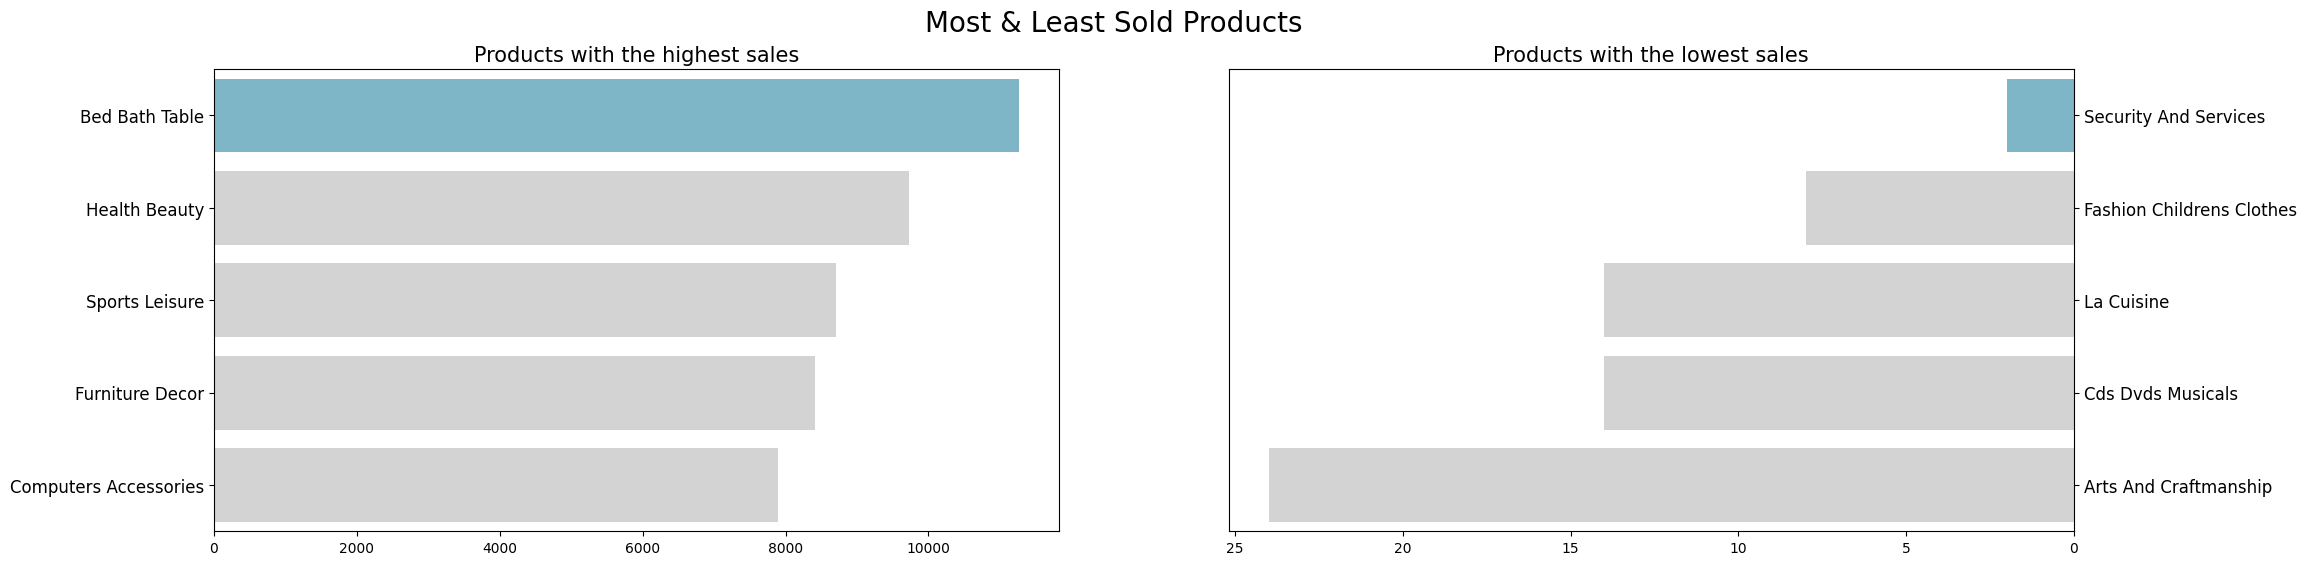

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", hue="product_category_name_english", data=most_sold_product.head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Products with the highest sales", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="product_id", y="product_category_name_english", hue="product_category_name_english", data=least_sold_product.head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Products with the lowest sales", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Most & Least Sold Products", fontsize=20)
plt.show()

Pertanyaan 2: Kota yang paling banyak customer

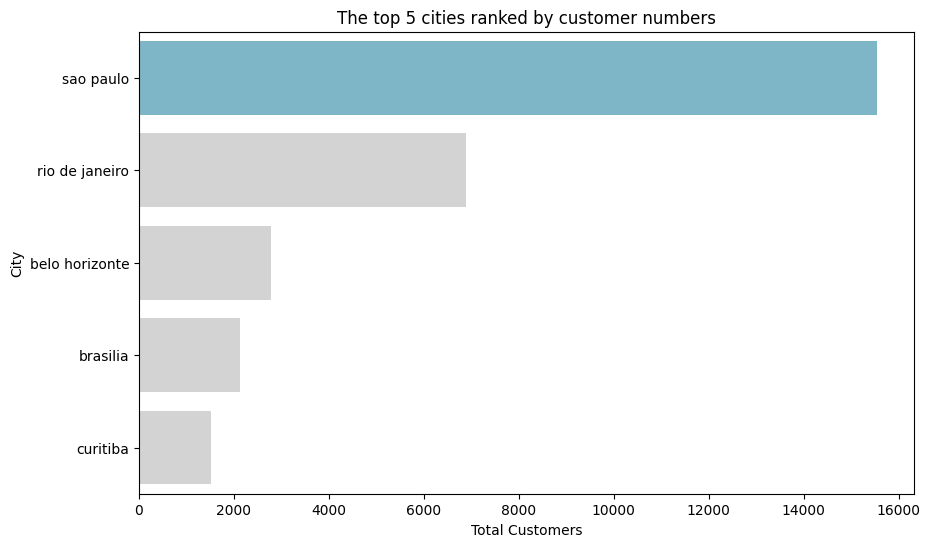

In [60]:
top_5_sales_city = top_sales_city.head()
plt.figure(figsize=(10, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="Total_customer", y="City", data=top_5_sales_city, hue=top_5_sales_city['City'], palette=colors, legend=False)
plt.xlabel('Total Customers')
plt.ylabel('City')
plt.title('The top 5 cities ranked by customer numbers')

plt.show()

Pertanyaan 3: Pada bulan dan tahun berapa penjualan mencapai puncaknya

In [61]:
# Ubah tipe data kolom 'order_purchase_timestamp' menjadi datetime
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Ekstrak tahun dan bulan dari kolom 'order_purchase_timestamp'
all_df['year'] = all_df['order_purchase_timestamp'].dt.year
all_df['month'] = all_df['order_purchase_timestamp'].dt.month

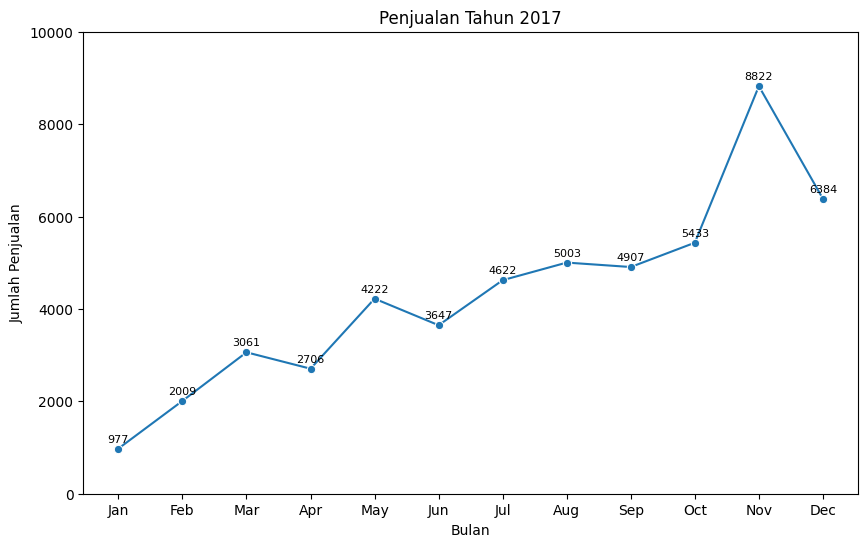

In [62]:
# Filter data untuk tahun 2017
sales_2017 = all_df[all_df['year'] == 2017].groupby('month')['order_id'].count().reset_index()

# Line chart untuk tahun 2017
fig, ax = plt.subplots(figsize=(10, 6))  # Membuat objek axes
sns.lineplot(x='month', y='order_id', data=sales_2017, marker='o', ax=ax)
plt.title('Penjualan Tahun 2017')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.ylim(bottom=0, top=10000)

for x, y in zip(sales_2017['month'], sales_2017['order_id']):
    plt.text(x, y + 100, str(y), ha='center', va='bottom', fontsize=8)

# Menghilangkan grid
ax.grid(False)

# Mengganti label bulan dengan 3 huruf pertama
ax.set_xticks(sales_2017['month'])
ax.set_xticklabels([pd.to_datetime(month, format='%m').strftime('%b') for month in sales_2017['month']])

plt.show()

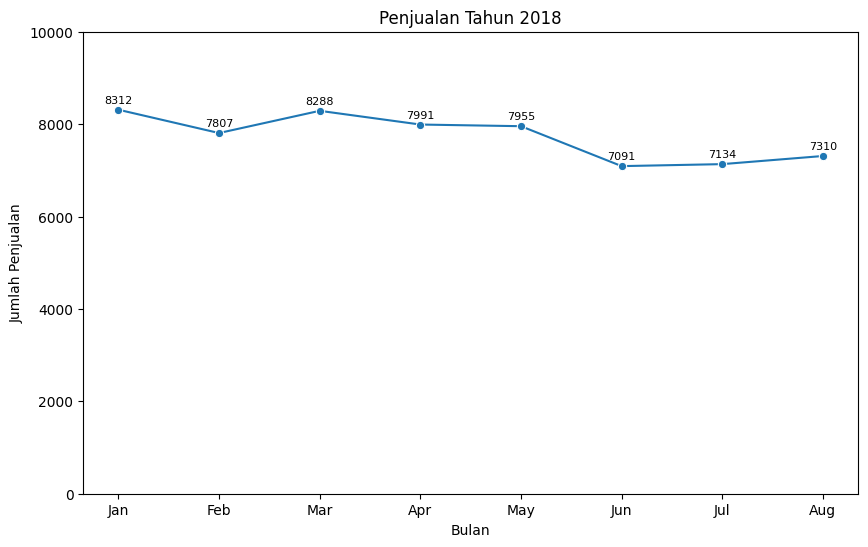

In [63]:
# Buat line chart untuk tahun 2018
sales_2018 = all_df[(all_df['year'] == 2018) & (all_df['month'] < 9)].groupby('month')['order_id'].count().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))  # Membuat objek axes dan fig
sns.lineplot(x='month', y='order_id', data=sales_2018, marker='o', ax=ax)  # Menambahkan ax=ax

plt.title('Penjualan Tahun 2018')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.xticks(sales_2018['month'])
plt.ylim(bottom=0, top=10000)

# Menambahkan label data
for x, y in zip(sales_2018['month'], sales_2018['order_id']):
    plt.text(x, y + 100, str(y), ha='center', va='bottom', fontsize=8)

# Menghilangkan grid
ax.grid(False)

# Mengganti label bulan dengan 3 huruf pertama
ax.set_xticklabels([pd.to_datetime(month, format='%m').strftime('%b') for month in sales_2018['month']])


plt.show()

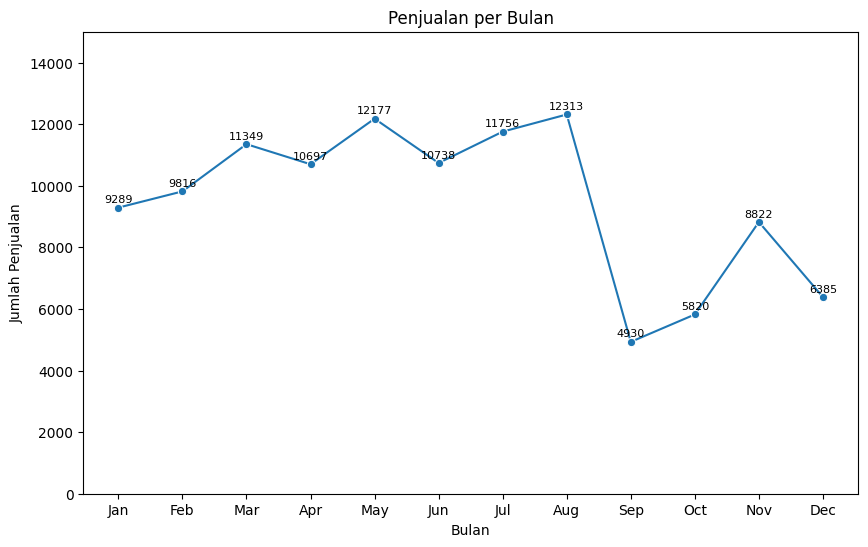

In [64]:
# Ubah tipe data kolom 'order_purchase_timestamp' menjadi datetime
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Ekstrak bulan dari kolom 'order_purchase_timestamp'
all_df['month'] = all_df['order_purchase_timestamp'].dt.month

# Hitung jumlah penjualan per bulan
sales_per_month = all_df.groupby('month')['order_id'].count().reset_index()

# Buat line chart untuk penjualan per bulan
fig, ax = plt.subplots(figsize=(10, 6))  # Membuat objek axes
sns.lineplot(x='month', y='order_id', data=sales_per_month, marker='o', ax=ax)
plt.title('Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.xticks(sales_per_month['month'])
plt.ylim(bottom=0, top=15000)


# Ubah label bulan menjadi 3 huruf pertama
ax.set_xticklabels([pd.to_datetime(month, format='%m').strftime('%b') for month in sales_per_month['month']])

# Menambahkan label data dengan ax.text() dan penyesuaian posisi
for x, y in zip(sales_per_month['month'], sales_per_month['order_id']):
    ax.text(x, y + 100, str(y), ha='center', va='bottom', fontsize=8)  # Menyesuaikan posisi dan ukuran font

ax.grid(False)

plt.show()

Pertanyaan 4: Seberapa puas customer dengan layanan e-commerce

<ipython-input-65-4070f9ca686b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating.index,


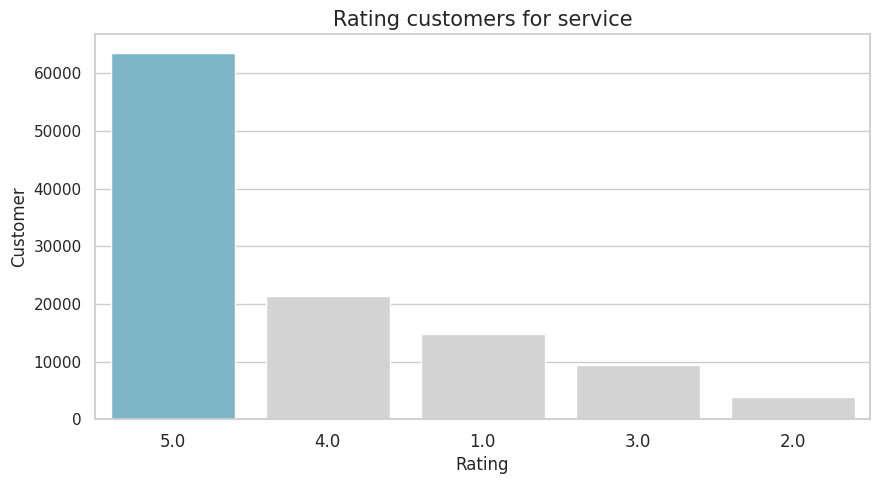

In [65]:
rating = all_df['review_score'].value_counts().sort_values(ascending=False)
max_count_rating = rating.idxmax()

colors = ["#72BCD4" if score == max_count_rating else "#D3D3D3" for score in rating.index]

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=rating.index,
            y=rating.values,
            order=rating.index,
            palette=colors
            )

plt.title("Rating customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()

Visualisasi RFM

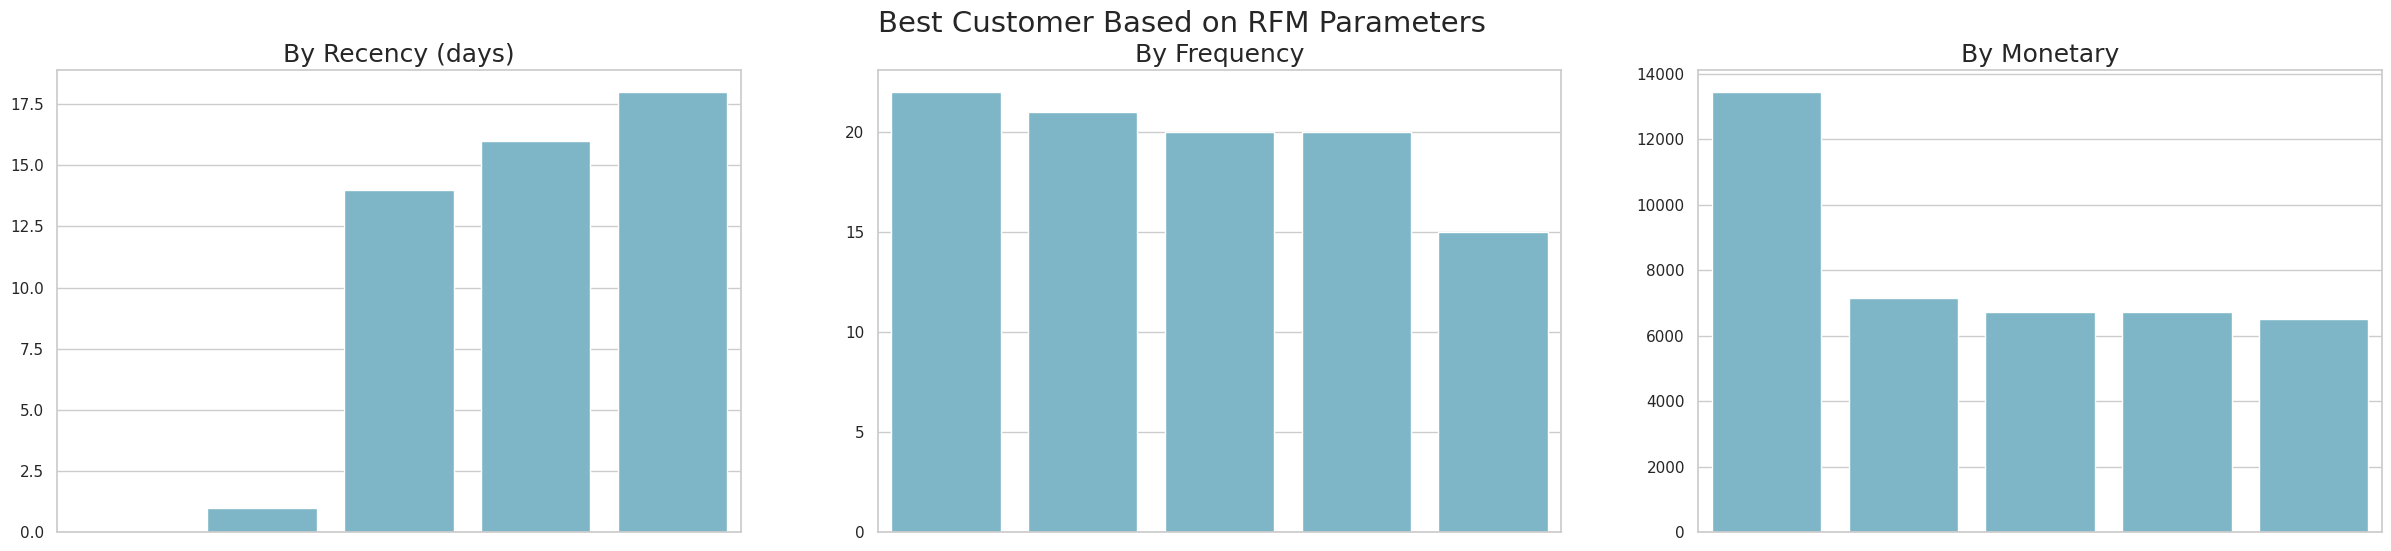

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="Recency", x="Customer_id", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), ax=ax[0], color=colors[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticks([])

sns.barplot(y="Frequency", x="Customer_id", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), ax=ax[1], color=colors[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticks([])

sns.barplot(y="Monetary", x="Customer_id", data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), ax=ax[2], color=colors[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticks([])

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=21)
plt.show()

## Conclusion

- **Top 5 Kategori Product yang paling banyak dan paling sedikit terjual**

  Kategori produk dengan penjualan tertinggi adalah Bed Bath & Table, Health & Beauty, Sports & Leisure, Furniture & Leisure, dan Computers & Accessories.
  Sementara itu, kategori produk dengan penjualan terendah adalah Security & Services, Fashion, La Cuisine, CDs, DVDs & Musicals, dan Arts & Craftsmanship.
  
- **Kota yang paling banyak customer**
  
  Berdasarkan analisis, São Paulo merupakan kota dengan jumlah pelanggan terbanyak

- **Pada bulan dan tahun berapa penjualan mencapai puncaknya**

  Analisis menunjukkan bahwa puncak penjualan terjadi pada bulan November tahun 2017. Grafik penjualan menunjukkan tren peningkatan penjualan pada tahun 2017. Sementara pada tahun 2018, tren penjualan cenderung stabil.

- **Seberapa puas customer dengan layanan e-commerce**

  Sebagian besar pelanggan memberikan skor 5, yang mengindikasikan tingkat kepuasan yang tinggi terhadap layanan e-commerce.